- This notebook contains codes for the calculation of daily sentiment index.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Import data from sentiment analysis 
df = pd.read_csv('data/data_tgb_48w_labelled.csv', index_col=0)
df.head()

,headline,n_replies,n_likes,year,month,day,category,views,sentiments
0,股票大跌以后为什么总上不去？,0,14,2019,10,5,原,923,0.232284
1,股市里的大道到底是什么？ - - -什么才是股市里的道。,2,68,2019,10,5,原,151,0.360709
2,人类文明还能存在多久？死亡天体正在逼近，科学家给出准确答案,10,178,2019,10,5,原,165,0.998810
3,跟随市场，理解市场，做到了即成功也,0,64,2019,10,5,原,4,0.958018
4,一步！一步！我要明天会更好！,0,58,2019,10,5,原,189,0.224666


In [3]:
# Concatenate year, month and day into datetime object 
date = []

for i in range(len(df)):
    y = df['year'][i]
    m = df['month'][i]
    d = df['day'][i]
    date.append(datetime.date(y, m, d))

df['date'] = date
df.head()

,headline,n_replies,n_likes,year,month,day,category,views,sentiments,date
0,股票大跌以后为什么总上不去？,0,14,2019,10,5,原,923,0.232284,2019-10-05
1,股市里的大道到底是什么？ - - -什么才是股市里的道。,2,68,2019,10,5,原,151,0.360709,2019-10-05
2,人类文明还能存在多久？死亡天体正在逼近，科学家给出准确答案,10,178,2019,10,5,原,165,0.998810,2019-10-05
3,跟随市场，理解市场，做到了即成功也,0,64,2019,10,5,原,4,0.958018,2019-10-05
4,一步！一步！我要明天会更好！,0,58,2019,10,5,原,189,0.224666,2019-10-05


In [4]:
# Calculate daily sentiment index 
sent = df.groupby('date').mean()['sentiments']
sent = pd.DataFrame(sent)

print(sent.shape)
sent.head()

(599, 1)


,sentiments
date,
2018-02-14,0.674938
2018-02-15,0.697567
2018-02-16,0.618761
2018-02-17,0.641510
2018-02-18,0.695295


In [5]:
# Standardize sentiment score 
mean = sent['sentiments'].mean()
std  = sent['sentiments'].std()

std_sent = []
for i in range(len(sent)):
    std_sent.append((sent['sentiments'][i]-mean)/std)

sent['std_sent'] = std_sent
sent.head(10)

,sentiments,std_sent
date,,
2018-02-14,0.674938,-1.120847
2018-02-15,0.697567,-0.608559
2018-02-16,0.618761,-2.392611
2018-02-17,0.641510,-1.877609
2018-02-18,0.695295,-0.659983
2018-02-19,0.638954,-1.935479
2018-02-20,0.647202,-1.748752
2018-02-21,0.733638,0.208039
2018-02-22,0.739318,0.336630


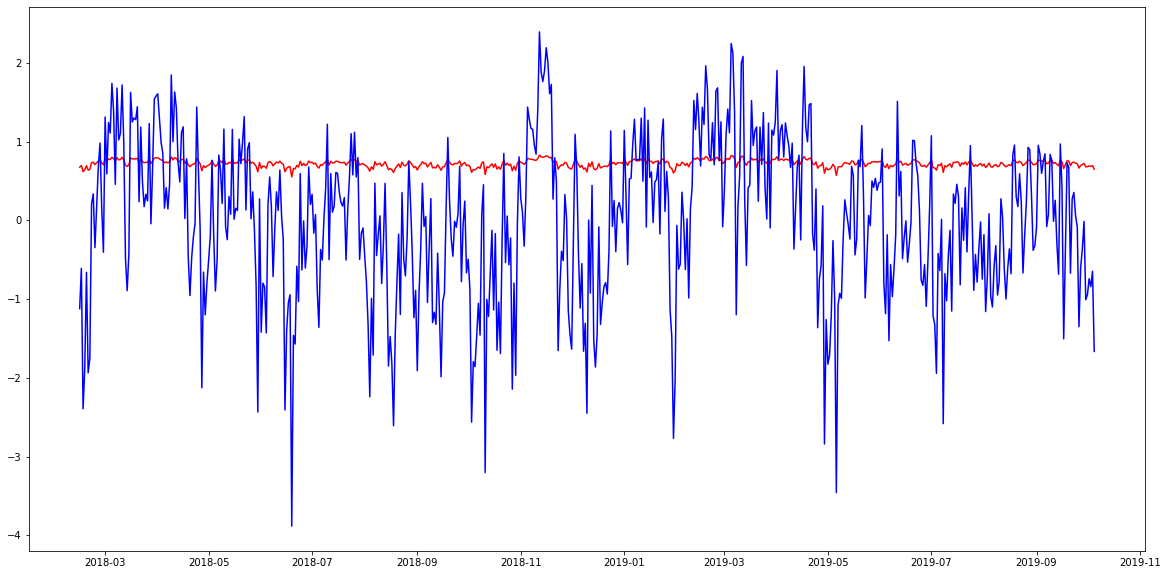

In [6]:
figure = plt.figure(figsize=(20, 10))
plt.plot(sent.index, sent['sentiments'], c='red')
plt.plot(sent.index, sent['std_sent'], c='blue')

In [7]:
sent.to_csv('data/data_sent.csv')